# A9- Dimensionality Reduction With PCA

## Table of Contents

1. [Introduction](#Introduction)
   - [Data Source](#Data-Source)
   - [Objective](#Objective)
2. [Data Preprocessing](#Data-Preprocessing)
   - [Data Cleaning](#Data-Cleaning)
   - [Normalization](#Normalization)
3. [Principal Component Analysis (PCA)](#Principal-Component-Analysis)
   - [Calculate Covariance Matrix](#Calculate-Covariance-Matrix)
   - [Calculate Eigenvectors and Eigenvalues](#Calculate-Eigenvectors-and-Eigenvalues)
   - [Sort Eigenvectors by Eigenvalues](#Sort-Eigenvectors-by-Eigenvalues)
   - [Select Top k Eigenvectors](#Select-Top-k-Eigenvectors)
   - [Transform Data into k Dimensions](#Transform-Data-into-k-Dimensions)
4. [Results](#Results)
   - [PCA Representation Plot](#PCA-Representation-Plot)
   - [Interpretation](#Interpretation)
5. [Conclusion](#Conclusion)


## Introduction

##### Data Source
The dataset that I am using is the Iris dataset, which is a well-known dataset and we have used this dataset in class previously to build a decison tree. The Iris dataset has 150 samples, with 4 features: sepal length, sepal width, petal length, and petal width. These features are measurements of different parts of the Iris flowers and are used to distinguish between three species: setosa, versicolor, and virginica.

- Link to dataset: https://www.kaggle.com/datasets/uciml/iris

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom column names
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load the Iris dataset
data = pd.read_csv("iris.csv", skiprows=1, names=col_names)

# Display the first few rows
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


##### Objective
In this analysis, I am applying Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and explore how the features relate to each other. PCA helps in transforming the original features into a smaller set of uncorrelated components, allowing us to visualize the data in a more interpretable way and potentially uncover patterns that might not be immediately obvious in the higher-dimensional space.

## Data Preprocessing

##### Data Cleaning
Now that we have an overview of our dataset, we can proceed with the data preprocessing steps. First, I examined the data types of each column to identify which ones contain numerical values, as PCA requires numerical data. Additionally, I checked for any missing (null) and  duplicate values to ensure the dataset is complete before proceeding with the analysis.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [3]:
# Check for missing values
data.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
# Check for duplicates
data.duplicated().sum()

3

##### Normalization
Now that we have separated our features and target variable, we can move on to the next preprocessing step. First, I identified the features 'X' and target variable 'y'. The features, which are the input data used for analysis, include all columns except the target variable 'species'. The target variable, species, is what we aim to predict or classify. By separating them, we ensure that the machine learning model or PCA only uses the features for the analysis, not the target.

Next, I applied normalization to the features. Since PCA is sensitive to the scale of the data, it’s important to scale the features to have a similar range. I used StandardScaler to standardize the features by removing the mean and scaling them to unit variance. This ensures that each feature contributes equally to the PCA, preventing any one feature from dominating due to a larger numerical range. By normalizing the data, we prepare it for PCA, where the transformation of data requires features to be on the same scale.

In [5]:
# Separating the features and target
X = data.drop("species", axis=1)  # Only features
y = data["species"]  # Target (species)

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Principal Component Analysis

##### Calculate Covariance Matrix
Next, we calculate the covariance matrix for the normalized features 'X_scaled'. The covariance matrix helps us understand how the features relate to each other, showing whether they increase or decrease together. By using the transposed version of the scaled data 'X_scaled.T', we ensure that the covariance is calculated between all pairs of features. This matrix is important for PCA because it shows the relationships between features and is used to find the directions in the data that have the most variance.

In [6]:
# Calculating the covariance matrix
cov_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


##### Calculate Eigenvectors and Eigenvalues
Next, I need to identify the directions in the data that capture the most significant patterns, which are represented by the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors can be thought of as new "super measurements" that combine the original iris measurements (such as petal length and width, if they are often correlated). The eigenvalues indicate the importance of each super measurement as the larger eigenvalues suggest that a particular direction explains more of the variance in the data. By calculating these, I can determine which combinations of features provide the most insight into the different iris species. This process may reveal that not all four original measurements are necessary to effectively distinguish between the flower types. PCA is useful in this way, as it reduces the complexity of the data while preserving the key patterns that differentiate the iris species.

In [7]:
# Calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


##### Sort Eigenvectors by Eigenvalues
Ordering the eigenvalues and their corresponding eigenvectors is necessary because it allows us to identify the most important principal components in PCA. As mentioned above the eigenvalues indicate the amount of variance each component explains, and sorting them in descending order ensures that we prioritize the components that capture the most significant patterns in the data. 

In [8]:
# Sorting eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)

Sorted Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601]
Sorted Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


The eigenvalues and eigenvectors provide important insights into the structure of the data.
The eigenvalues indicate how much variance each principal component explains, with the first eigenvalue '2.93' being the largest, suggesting that the first principal component captures the most significant variation in the data. The second eigenvalue '0.93' also captures some variance, but much less than the first. The third and fourth eigenvalues, '0.15' and '0.02', are quite small, meaning that these components explain very little of the data's variance and might not be as useful for distinguishing between iris species. The eigenvectors represent the directions of these principal components in the feature space. For example, the first eigenvector shows that petal length and sepal length contribute the most to the first principal component, indicating that these features are crucial for explaining the main patterns in the data. The second eigenvector highlights the importance of sepal width and petal length in the second principal component. The third and fourth components, which capture less variance, have lower absolute values in their eigenvectors, suggesting they involve combinations of features that don't significantly impact the overall structure of the data. This analysis shows that by focusing on the first two principal components, we can reduce the complexity of the dataset while still retaining most of the valuable information needed to differentiate the iris species.

##### Select Top k Eigenvectors
In this analysis, the top 2 eigenvectors were selected to retain the most significant patterns in the data. The eigenvectors correspond to the directions that capture the highest variance in the dataset, and by selecting the first two, we aim to preserve the key information that distinguishes the iris species. 

The two components accounted for a variance of about 95.8% or 0.958. This means that the first two principal components capture almost 96% of the total variance in the dataset, retaining the majority of the important features. This is significant because it lets us know that, with only two components, we would retain almost all the original information of the dataset. Thus, a reduction in dimensions makes the dataset easier to look at without losing essentially very much useful information necessary to distinguish the iris species from one another. 

In [9]:
# Selecting the top 2 eigenvectors
k = 2
top_eigenvectors = sorted_eigenvectors[:, :k]
print("Top 2 Eigenvectors:\n", top_eigenvectors)

# Variance explained by the selected components
explained_variance_ratio = sorted_eigenvalues[:k] / np.sum(sorted_eigenvalues)
print("Explained Variance by top 2 components:", explained_variance_ratio.sum())

Top 2 Eigenvectors:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]
Explained Variance by top 2 components: 0.9580097536148195


##### Transform Data into k Dimensions
To get the reduced k-dimensional representation of the original data, I projected the scaled feature data 'X_scaled' onto the selected top 2 eigenvectors through proper linear transformation. I achieved this by applying the matrix multiplication of 'X_scaled' with the matrix of top 2 eigenvectors. This resulted in a new dataset 'X_reduced', where each data point is now represented by its coordinates along the first two principal components, PC1 and PC2. 

After the transformation, I created a new DataFrame 'pca_df' containing the reduced data in the form of the two principal components 'PC1' and 'PC2' and I added the target labels 'iris species' for easier interpretation. The first few rows of this data frame show how the data has been reduced and how each sample is now represented in this lower-dimensional space, which captures the most important variance in the data.

In [10]:
# Projecting the data onto the new k-dimensional space
X_reduced = X_scaled.dot(top_eigenvectors)
pca_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df.head()

,PC1,PC2,target
0,-2.264542,-0.505704,NaN
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


##  Results

##### PCA Representation Plot
To visualize the data in the reduced 2-D space, we use a scatter plot where PC1 and PC2 represent the principal components, and the color of each data point indicates its corresponding iris species.

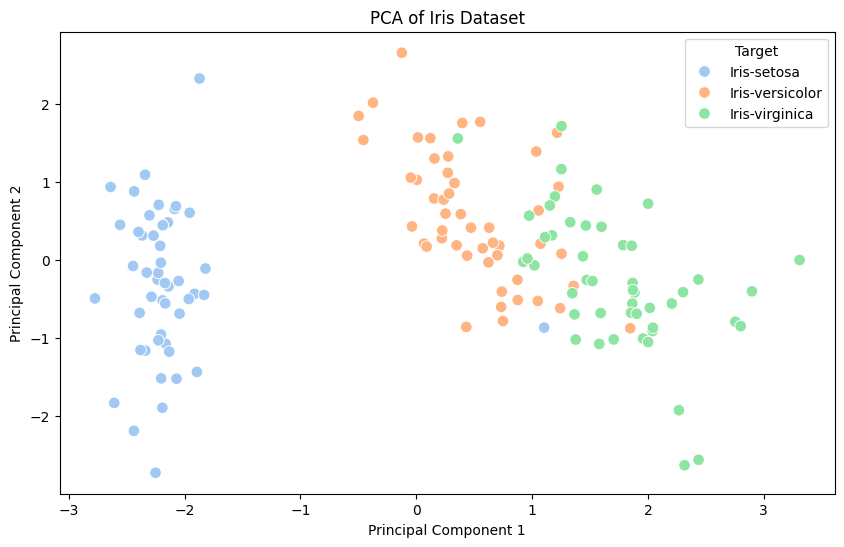

In [11]:
# Plotting the PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='pastel', s=70)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.show()

##### Interpretation
The Principal Component Analysis (PCA) plot of the Iris dataset clearly depicts the clustering of three Iris species-Iris-setosa, Iris-versicolor, and Iris-virginica-based on their respective key features reduced to two principal components. The Iris-setosa species, shown in light blue points, formed a cluster on the left side of the plot, indicating that it possessed some distinguishing characteristics from the other two species. In contrast, Iris-versicolor (orange points) and Iris-virginica (green points) had significant overlapping in the plot just right at center. It implies that these two species are more similar to each other according to the features analyzed. The x-axis corresponds to Principal Component 1, which accounts for the maximum variance in the dataset, thereby playing an important role in discrimination between Iris-setosa and the rest, while the y-axis corresponds to Principal Component 2, which can even distinguish Iris-versicolor from Iris-virginica. This visualization illustrates the inherent structure of the dataset, highlighting how Iris-setosa stands apart, while Iris-versicolor and Iris-virginica share more common traits.

## Conclusion
In conclusion, the PCA of the Iris dataset has provided valuable insights into the structure of the data by reducing its dimensions to two components. By viewing the scatter plot of the transformed components, we can clearly observe how the three types of Iris— Iris-setosa, Iris-versicolor, and Iris-virginica—are clustered based on their key distinguishing features. The separation of Iris-setosa into a distinct, tight cluster highlights its uniqueness, while the overlap between Iris-versicolor and Iris-virginica suggests that these species share more similar characteristics. Principal Component 1 explains the majority of the variance and is responsible for separating Iris-setosa from the other two species. Principal Component 2 further distinguishes Iris-versicolor from Iris-virginica. The explained variance of the selected components is nearly 96%, demonstrating that PCA effectively preserves the significant inherent patterns within the data, allowing for a simplified representation of the species' features while retaining key information. This analysis shows how PCA can both reduce dimensions and reveal the structure of complex datasets, facilitating a clearer and more efficient analysis.
